DATA IMPORTING

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Datasets/tweets.csv', encoding="ISO-8859-1", names=['target','ids','date','flag','user','text'])
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df['target'].unique() # Checking the unique target values

array([0, 4], dtype=int64)

<AxesSubplot:xlabel='target', ylabel='count'>

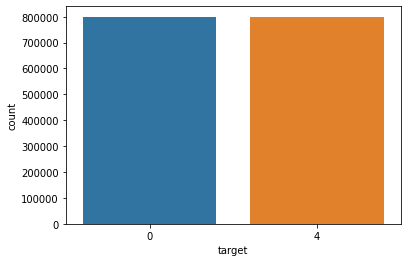

In [4]:
import seaborn as sns
sns.countplot(x='target', data=df) # Visualizes that there are equal polarity in tweets  

DATA PREPROCESSING

In [5]:
data = df[['text', 'target']]
data['target'] = data['target'].replace(4,1) # Changing 4 to 1 for ease of understanding

<ipython-input-5-b53ecc5ab072>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1) # Changing 4 to 1 for ease of understanding


In [6]:
data_pos = data[data['target'] == 1] # Taking separate frames for the two polarities
data_neg = data[data['target'] == 0]

In [7]:
data_pos = data_pos.iloc[:int(20000)] # Taking 1/40th of the data to make it runnable on my machine
data_neg = data_neg.iloc[:int(20000)]
dataset = pd.concat([data_pos, data_neg]) # Concataneting both positive and negative tweets

DATA CLEANING

In [8]:
dataset['text'] = dataset['text'].str.lower() # Making the tweets all in lowercase

In [9]:
from nltk.corpus import stopwords

stopwordlist = set(stopwords.words('english')) 
stopwords = set(stopwordlist)
def stopword_removal(text):
    return " ".join(word for word in str(text).split() if word not in stopwords)
dataset['text'] = dataset['text'].apply(lambda x: stopword_removal(x)) # Removing the stopwords from the tweets

In [10]:
import string

punctuations = string.punctuation
def punctuation_removal(text):
    trans_str = str.maketrans('', '', punctuations)
    return text.translate(trans_str) # Removing the punctuations from the tweets
dataset['text'] = dataset['text'].apply(lambda x: punctuation_removal(x))

In [11]:
import re

# Removing the URLs from the tweets
def URL_removal(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)
dataset['text'] = dataset['text'].apply(lambda x: URL_removal(x))

In [12]:
# Removing Numbers from the tweets
def numbers_removal(text):
    return re.sub('[0-9]+', '', text)
dataset['text'] = dataset['text'].apply(lambda x: numbers_removal(x))
dataset

,text,target
800000,love healthuandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn effect everyone,1
...,...,...
19995,much time weekend work trip malmï¿½ frisat tod...,0
19996,one day holidays,0
19997,feeling right hate damn humprey,0
19998,geezi hv read whole book personality types emb...,0


In [13]:
# Lemmatizing each word in the tweet
from textblob import Word

dataset['text'] = dataset['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataset

,text,target
800000,love healthuandpets u guy r best,1
800001,im meeting one besties tonight cant wait girl ...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurt much eat real food plus...,1
800004,lovesbrooklyn effect everyone,1
...,...,...
19995,much time weekend work trip malmï¿½ frisat tod...,0
19996,one day holiday,0
19997,feeling right hate damn humprey,0
19998,geezi hv read whole book personality type emba...,0


In [14]:
# Stemming each word in the tweet
import nltk

st = nltk.PorterStemmer()
dataset['text'] = dataset['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
dataset.head()

,text,target
800000,love healthuandpet u guy r best,1
800001,im meet one besti tonight cant wait girl talk,1
800002,darealsunisakim thank twitter add sunisa got m...,1
800003,sick realli cheap hurt much eat real food plu ...,1
800004,lovesbrooklyn effect everyon,1


In [15]:
# Getting the polarity and subjectivity of every tweet
from textblob import TextBlob
dataset['polarity'] = dataset['text'].apply(lambda x: TextBlob(x).sentiment[0])
dataset['subjectivity'] = dataset['text'].apply(lambda x: TextBlob(x).sentiment[1])
dataset

,text,target,polarity,subjectivity
800000,love healthuandpet u guy r best,1,0.750000,0.450000
800001,im meet one besti tonight cant wait girl talk,1,0.000000,0.000000
800002,darealsunisakim thank twitter add sunisa got m...,1,0.000000,0.000000
800003,sick realli cheap hurt much eat real food plu ...,1,0.021429,0.514286
800004,lovesbrooklyn effect everyon,1,0.000000,0.000000
...,...,...,...,...
19995,much time weekend work trip malmï¿½ frisat tod...,0,0.450000,0.400000
19996,one day holiday,0,0.000000,0.000000
19997,feel right hate damn humprey,0,-0.257143,0.717857
19998,geezi hv read whole book person type embark ty...,0,0.250000,0.300000


VECTORIZING AND FITTING DATASETS

In [23]:
# Importing necessary libraries and modules

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

In [31]:
# Splitting training and testing sets
X=data.text  
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [32]:
# Fitting into TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
len(vectoriser.get_feature_names())

500000

In [33]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

PREDICTION AND MODEL EVALUATION

In [34]:
# Defining a func to evaluate a model
def model_Evaluate(model):
    # Predicting values for Test dataset
    y_pred = model.predict(X_test)
    
    # Printing the evaluation metrics for the dataset
    print(classification_report(y_test, y_pred))
    
    # Computing the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



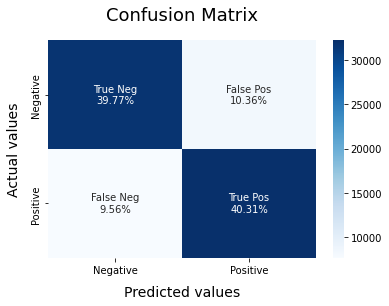

In [35]:
# Model-1 : Bernoulli Naive Bayes classifier
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



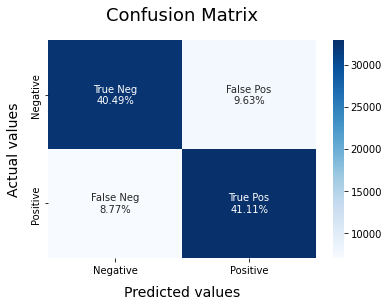

In [36]:
# Model-2 : SVM classifier
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



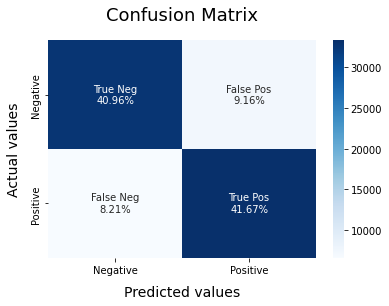

In [37]:
# Model-3 : Logistic Regression classifier
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)